<a href="https://colab.research.google.com/github/DLesmes/cvSrc/blob/main/modern_cv_gen_ai/pre_trained_Object_Detection_in_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## requirements

In [1]:
!pip install keras-cv keras-core

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 650.7/650.7 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 22.4 MB/s eta 0:00:00


In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
from tensorflow.keras import optimizers
import keras_cv
import numpy as np
from keras_cv import bounding_box
import os
import resource
from keras_cv import visualization
import tqdm


## Setting up model

In [3]:
pretrained_model = keras_cv.models.RetinaNet.from_preset(
    "retinanet_resnet50_pascalvoc",
    bounding_box_format="xywh"
)

100%|██████████| 5.37k/5.37k [00:00<00:00, 4.08MB/s]


100%|██████████| 136M/136M [00:04<00:00, 33.5MB/s]


### sample data

503484/503484 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


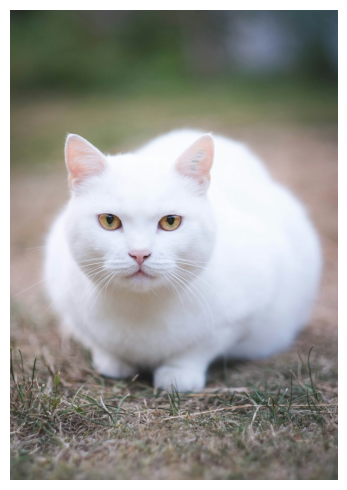

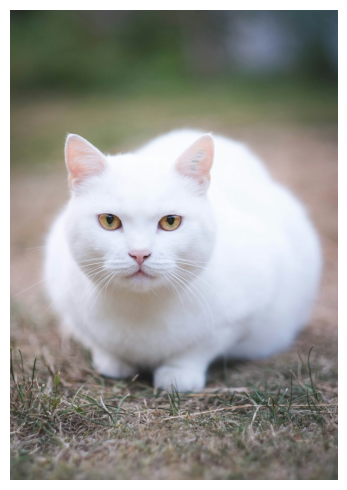

In [5]:
url = 'https://images.unsplash.com/photo-1531040630173-7cfb894c8eaa?q=80&w=1904&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D'
filepath = tf.keras.utils.get_file(origin=url)
image = keras.utils.load_img(filepath)
image = np.array(image)
h, w, c = image.shape
batch = image.reshape(1, h, w, c)

visualization.plot_image_gallery(
    batch,
    value_range=(0, 255),
    rows=1,
    cols=1,
    scale=5,
)

### sample inference

In [6]:
inference_resizing = keras_cv.layers.Resizing(
    640,
    640,
    pad_to_aspect_ratio=True,
    bounding_box_format="xywh"
)

image_batch = inference_resizing(batch)

### data labels

In [7]:
label_names = [
    "Aeroplane",
    "Bicycle",
    "Bird",
    "Boat",
    "Bottle",
    "Bus",
    "Car",
    "Cat",
    "Chair",
    "Cow",
    "Dining Table",
    "Dog",
    "Horse",
    "Motorbike",
    "Person",
    "Potted Plant",
    "Sheep",
    "Sofa",
    "Train",
    "Tvmonitor",
    "Total",
]

id2label = {k: v for k, v in enumerate(label_names)}

### running predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 45s 45s/step


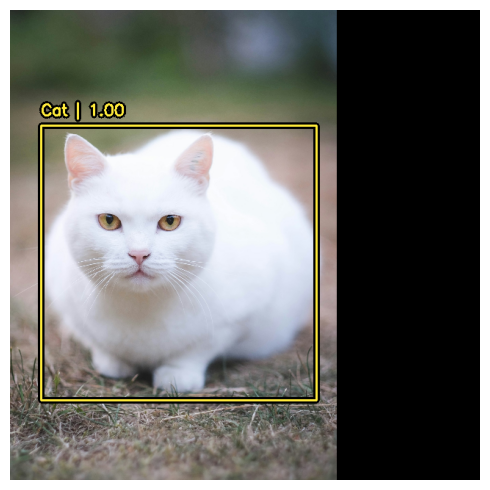

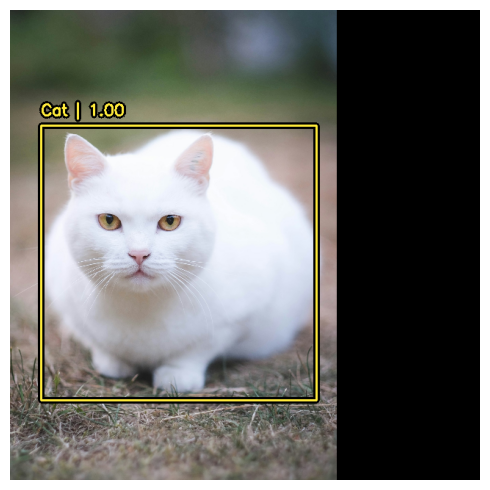

In [8]:
%% time
y_pred = pretrained_model.predict(image_batch)
# y_pred is a bounding box Tensor:
# {"classes": ..., "boxes": ...}
visualization.plot_bounding_box_gallery(
    image_batch,
    value_range=(0, 255),
    rows=1,
    cols=1,
    y_pred=y_pred,
    scale=5,
    font_scale=0.7,
    bounding_box_format="xywh",
    class_mapping=id2label,
)

In [12]:
y_pred.keys()

dict_keys(['boxes', 'confidence', 'classes', 'num_detections'])

43419/43419 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


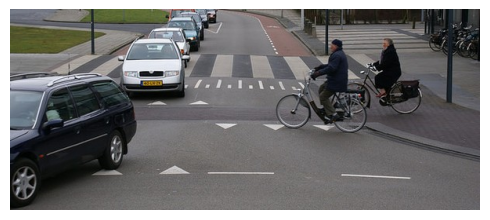

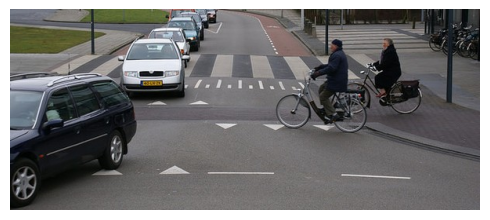

In [9]:
url = 'https://archive.org/download/street_202308/street.jpeg'
filepath = tf.keras.utils.get_file(origin=url)
image = keras.utils.load_img(filepath)
image = np.array(image)
h, w, c = image.shape
batch = image.reshape(1, h, w, c)
image_batch = inference_resizing(batch)

visualization.plot_image_gallery(
    batch,
    value_range=(0, 255),
    rows=1,
    cols=1,
    scale=5,
)

### NonMaxSuppression

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


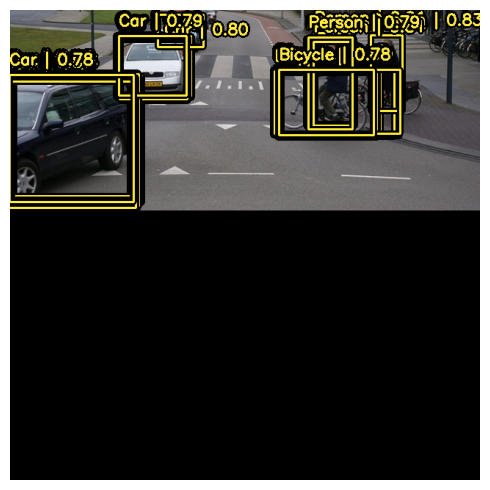

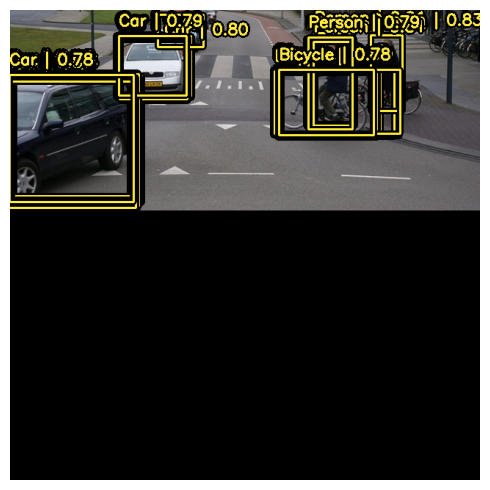

In [10]:
# The following NonMaxSuppression layer is equivalent to disabling the operation
prediction_decoder = keras_cv.layers.MultiClassNonMaxSuppression(
    bounding_box_format="xywh",
    from_logits=True,
    iou_threshold=1.0,
    confidence_threshold=0.0,
)
pretrained_model.prediction_decoder = prediction_decoder

y_pred = pretrained_model.predict(image_batch)
visualization.plot_bounding_box_gallery(
    image_batch,
    value_range=(0, 255),
    rows=1,
    cols=1,
    y_pred=y_pred,
    scale=5,
    font_scale=0.7,
    bounding_box_format="xywh",
    class_mapping=id2label,
)

### Getting just the proper bbox

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


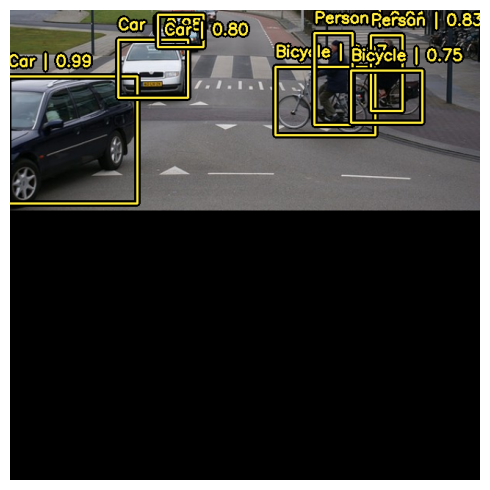

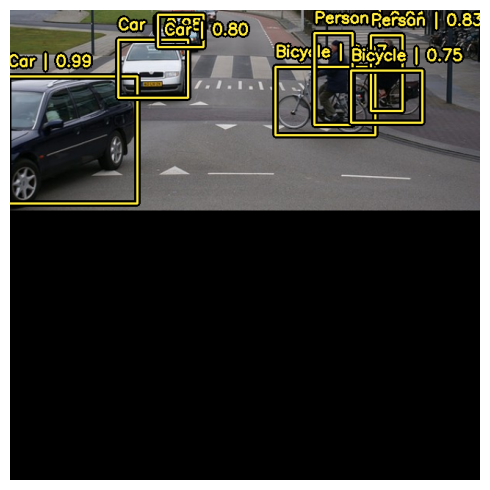

In [13]:
prediction_decoder = keras_cv.layers.MultiClassNonMaxSuppression(
    bounding_box_format="xywh",
    from_logits=True,
    # Decrease the required threshold to make predictions get pruned out
    iou_threshold=0.2,
    # tune confidence threshold for predictions to pass NMS
    confidence_threshold=0.7,
)
pretrained_model.prediction_decoder = prediction_decoder

y_pred = pretrained_model.predict(image_batch)
visualization.plot_bounding_box_gallery(
    image_batch,
    value_range=(0, 255),
    rows=1,
    cols=1,
    y_pred=y_pred,
    scale=5,
    font_scale=0.7,
    bounding_box_format="xywh",
    class_mapping=id2label,
)